<a href="https://colab.research.google.com/github/channdankumar/HOUSE_PRICE_PREDICTION/blob/main/Copy_of_Covid_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_csv('/content/Covid Data.csv')

In [ ]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,97.0


In [ ]:
data.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
153336,2,4,2,1,9999-99-99,97,2,47,97,2,...,2,2,2,2.0,2.0,2.0,2.0,1.0,3.0,97.0
153337,1,4,1,1,9999-99-99,97,1,50,2,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,97.0
153338,2,4,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,97.0
153339,2,4,2,2,9999-99-99,1,1,66,97,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,2.0
153340,1,4,1,2,9999-99-99,2,2,78,2,1,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(153341, 21)

In [ ]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [ ]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           1
CARDIOVASCULAR          1
OBESITY                 1
RENAL_CHRONIC           1
TOBACCO                 1
CLASIFFICATION_FINAL    1
ICU                     1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153341 entries, 0 to 153340
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 153341 non-null  int64  
 1   MEDICAL_UNIT          153341 non-null  int64  
 2   SEX                   153341 non-null  int64  
 3   PATIENT_TYPE          153341 non-null  int64  
 4   DATE_DIED             153341 non-null  object 
 5   INTUBED               153341 non-null  int64  
 6   PNEUMONIA             153341 non-null  int64  
 7   AGE                   153341 non-null  int64  
 8   PREGNANT              153341 non-null  int64  
 9   DIABETES              153341 non-null  int64  
 10  COPD                  153341 non-null  int64  
 11  ASTHMA                153341 non-null  int64  
 12  INMSUPR               153341 non-null  int64  
 13  HIPERTENSION          153341 non-null  int64  
 14  OTHER_DISEASE         153340 non-null  float64
 15  

In [ ]:
data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,153341.000000,153341.000000,153341.000000,153341.000000,153341.000000,153341.000000,153341.000000,153341.000000,153341.000000,153341.000000,153341.000000,153341.000000,153341.000000,153340.000000,153340.000000,153340.000000,153340.000000,153340.000000,153340.000000,153340.000000
mean,1.544603,3.869793,1.537097,1.427544,56.873869,2.217946,47.984009,53.066375,1.927573,2.102536,2.099856,2.108451,1.862692,2.083109,2.100678,1.884759,2.089748,2.064178,3.535698,56.980886
std,0.498008,0.348377,0.498624,0.494724,47.052525,6.840117,16.860307,47.372722,3.494673,3.486254,3.504089,3.511265,3.342292,3.634482,3.521249,2.638986,3.497144,3.645807,1.332665,46.933923
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,4.000000,2.000000,1.000000,97.000000,2.000000,47.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
75%,2.000000,4.000000,2.000000,2.000000,97.000000,2.000000,60.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
max,2.000000,4.000000,2.000000,2.000000,99.000000,99.000000,107.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [ ]:
data.nunique()

USMER                     2
MEDICAL_UNIT              4
SEX                       2
PATIENT_TYPE              2
DATE_DIED               337
INTUBED                   4
PNEUMONIA                 3
AGE                     105
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [ ]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,97.0


In [ ]:
data.iloc[1]

USMER                            2
MEDICAL_UNIT                     1
SEX                              2
PATIENT_TYPE                     1
DATE_DIED               03/06/2020
INTUBED                         97
PNEUMONIA                        1
AGE                             72
PREGNANT                        97
DIABETES                         2
COPD                             2
ASTHMA                           2
INMSUPR                          2
HIPERTENSION                     1
OTHER_DISEASE                  2.0
CARDIOVASCULAR                 2.0
OBESITY                        1.0
RENAL_CHRONIC                  1.0
TOBACCO                        2.0
CLASIFFICATION_FINAL           5.0
ICU                           97.0
Name: 1, dtype: object

In [ ]:
data.iloc[2]

USMER                            2
MEDICAL_UNIT                     1
SEX                              2
PATIENT_TYPE                     2
DATE_DIED               09/06/2020
INTUBED                          1
PNEUMONIA                        2
AGE                             55
PREGNANT                        97
DIABETES                         1
COPD                             2
ASTHMA                           2
INMSUPR                          2
HIPERTENSION                     2
OTHER_DISEASE                  2.0
CARDIOVASCULAR                 2.0
OBESITY                        2.0
RENAL_CHRONIC                  2.0
TOBACCO                        2.0
CLASIFFICATION_FINAL           3.0
ICU                            2.0
Name: 2, dtype: object

In [ ]:
data.iloc[1:3]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,2.0


In [ ]:
data.iloc[[1,3,5]]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2.0,2.0,1.0,1.0,2.0,5.0,97.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,7.0,97.0
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,2.0


In [ ]:
data.iloc[[1,4,6,8]]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2.0,2.0,1.0,1.0,2.0,5.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,97.0
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,97.0
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2.0,2.0,1.0,2.0,2.0,3.0,2.0


In [ ]:
data.iloc[:,[1,3,4]]

,MEDICAL_UNIT,PATIENT_TYPE,DATE_DIED
0,1,1,03/05/2020
1,1,1,03/06/2020
2,1,2,09/06/2020
3,1,1,12/06/2020
4,1,1,21/06/2020
...,...,...,...
153336,4,1,9999-99-99
153337,4,1,9999-99-99
153338,4,1,9999-99-99
153339,4,2,9999-99-99


In [ ]:
data.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
153336,2,4,2,1,9999-99-99,97,2,47,97,2,...,2,2,2,2.0,2.0,2.0,2.0,1.0,3.0,97.0
153337,1,4,1,1,9999-99-99,97,1,50,2,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,97.0
153338,2,4,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,97.0
153339,2,4,2,2,9999-99-99,1,1,66,97,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,2.0
153340,1,4,1,2,9999-99-99,2,2,78,2,1,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

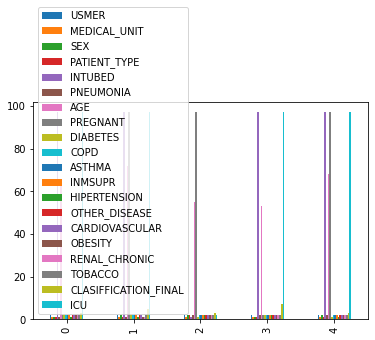

In [ ]:
data.head().plot(kind='bar')

<AxesSubplot:>

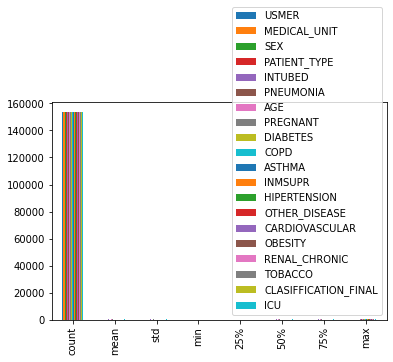

In [ ]:
data.describe().plot(kind='bar')

<AxesSubplot:>

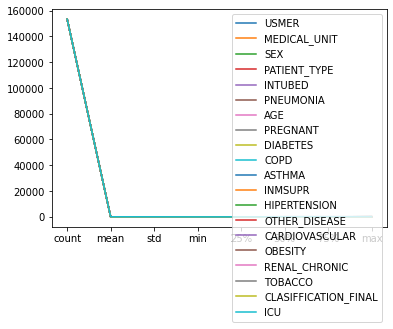

In [ ]:
data.describe().plot(kind='line')

<AxesSubplot:>

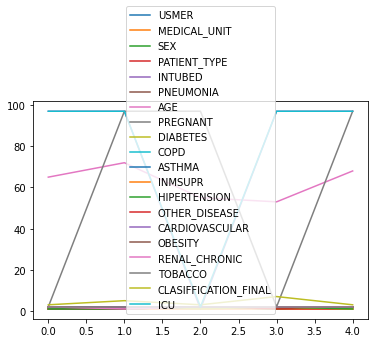

In [ ]:
data.head().plot(kind='line')

<AxesSubplot:ylabel='Frequency'>

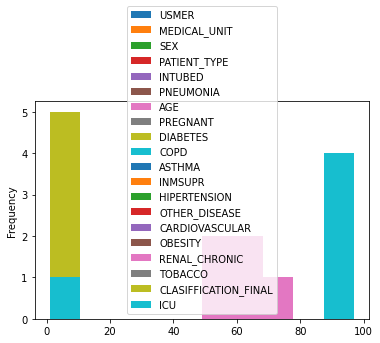

In [ ]:
data.head().plot(kind='hist')

<AxesSubplot:>

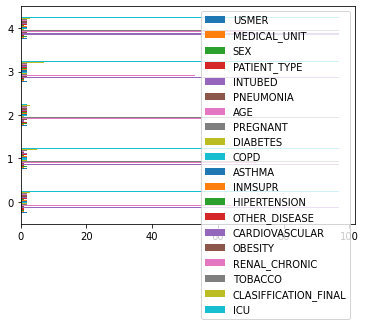

In [ ]:
data.head().plot(kind='barh')